In [1]:
import numpy as np
import pandas as pd
from pylab import plt,mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'

pd.set_option('precision',4)
np.set_printoptions(suppress=True,precision=4)

In [2]:
url='http://hilpisch.com/aiif_eikon_eod_data.csv'

In [3]:
data=pd.read_csv(url,index_col=0,parse_dates=True).dropna()
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.5728,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.6257,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.1385,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.0828,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
2010-01-08,30.2828,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,284.2700,157.380,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.9100,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.8000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33


<AxesSubplot:xlabel='Date'>

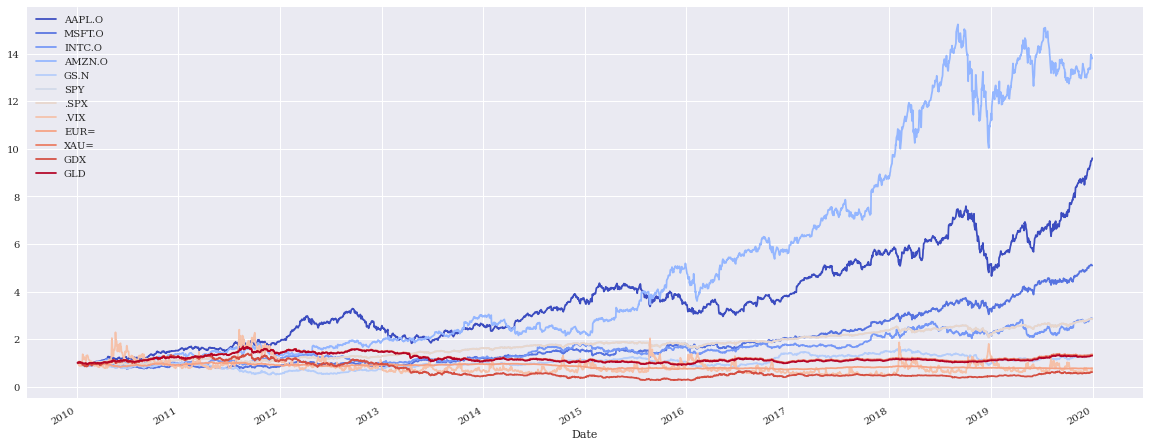

In [4]:
(data/data.iloc[0]).plot(figsize=(20,8),cmap='coolwarm')

In [5]:
lags=7

In [6]:
def add_lags(data,ric,lags):
    cols=[]
    df=pd.DataFrame(data[ric])
    for lag in range(1,lags+1):
        col='lag_{}'.format(lag)
        df[col]=df[ric].shift(lag)
        cols.append(col)
        
    df.dropna(inplace=True)
    return df,cols

In [7]:
dfs={}
for sym in data.columns:
    df,cols =add_lags(data,sym,lags)
    dfs[sym]=df

In [8]:
dfs[sym].head(7)

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-13,111.54,110.49,112.85,111.37,110.82,111.51,109.70,109.80
2010-01-14,112.03,111.54,110.49,112.85,111.37,110.82,111.51,109.70
2010-01-15,110.86,112.03,111.54,110.49,112.85,111.37,110.82,111.51
2010-01-19,111.52,110.86,112.03,111.54,110.49,112.85,111.37,110.82
2010-01-20,108.94,111.52,110.86,112.03,111.54,110.49,112.85,111.37
2010-01-21,107.37,108.94,111.52,110.86,112.03,111.54,110.49,112.85
2010-01-22,107.17,107.37,108.94,111.52,110.86,112.03,111.54,110.49


In [9]:
regs={}
for sym in data.columns:
    df=dfs[sym]
    reg=np.linalg.lstsq(df[cols],df[sym],rcond=-1)[0]
    regs[sym]=reg

In [10]:
regs

{'AAPL.O': array([ 1.0106, -0.0592,  0.0258,  0.0535, -0.0172,  0.006 , -0.0184]),
 'MSFT.O': array([ 0.8928,  0.0112,  0.1175, -0.0832, -0.0258,  0.0567,  0.0323]),
 'INTC.O': array([ 0.9519,  0.0579,  0.049 , -0.0772, -0.0373,  0.0449,  0.0112]),
 'AMZN.O': array([ 0.9799, -0.0134,  0.0206,  0.0007,  0.0525, -0.0452,  0.0056]),
 'GS.N': array([ 0.9806,  0.0342, -0.0172,  0.0042, -0.0387,  0.0585, -0.0215]),
 'SPY': array([ 0.9692,  0.0067,  0.0228, -0.0244, -0.0237,  0.0379,  0.0121]),
 '.SPX': array([ 0.9672,  0.0106,  0.0219, -0.0252, -0.0318,  0.0515,  0.0063]),
 '.VIX': array([ 0.8823,  0.0591, -0.0289,  0.0284, -0.0256,  0.0511,  0.0306]),
 'EUR=': array([ 0.9859,  0.0239, -0.0484,  0.0508, -0.0217,  0.0149, -0.0055]),
 'XAU=': array([ 0.9864,  0.0069,  0.0166, -0.0215,  0.0044,  0.0198, -0.0125]),
 'GDX': array([ 0.9765,  0.0096, -0.0039,  0.0223, -0.0364,  0.0379, -0.0065]),
 'GLD': array([ 0.9766,  0.0246,  0.006 , -0.0142, -0.0047,  0.0223, -0.0106])}

In [11]:
tuple(regs.values())

(array([ 1.0106, -0.0592,  0.0258,  0.0535, -0.0172,  0.006 , -0.0184]),
 array([ 0.8928,  0.0112,  0.1175, -0.0832, -0.0258,  0.0567,  0.0323]),
 array([ 0.9519,  0.0579,  0.049 , -0.0772, -0.0373,  0.0449,  0.0112]),
 array([ 0.9799, -0.0134,  0.0206,  0.0007,  0.0525, -0.0452,  0.0056]),
 array([ 0.9806,  0.0342, -0.0172,  0.0042, -0.0387,  0.0585, -0.0215]),
 array([ 0.9692,  0.0067,  0.0228, -0.0244, -0.0237,  0.0379,  0.0121]),
 array([ 0.9672,  0.0106,  0.0219, -0.0252, -0.0318,  0.0515,  0.0063]),
 array([ 0.8823,  0.0591, -0.0289,  0.0284, -0.0256,  0.0511,  0.0306]),
 array([ 0.9859,  0.0239, -0.0484,  0.0508, -0.0217,  0.0149, -0.0055]),
 array([ 0.9864,  0.0069,  0.0166, -0.0215,  0.0044,  0.0198, -0.0125]),
 array([ 0.9765,  0.0096, -0.0039,  0.0223, -0.0364,  0.0379, -0.0065]),
 array([ 0.9766,  0.0246,  0.006 , -0.0142, -0.0047,  0.0223, -0.0106]))

In [12]:
#combines the optimal results into a single ndarray object
rega=np.stack(tuple(regs.values()))
rega

array([[ 1.0106, -0.0592,  0.0258,  0.0535, -0.0172,  0.006 , -0.0184],
       [ 0.8928,  0.0112,  0.1175, -0.0832, -0.0258,  0.0567,  0.0323],
       [ 0.9519,  0.0579,  0.049 , -0.0772, -0.0373,  0.0449,  0.0112],
       [ 0.9799, -0.0134,  0.0206,  0.0007,  0.0525, -0.0452,  0.0056],
       [ 0.9806,  0.0342, -0.0172,  0.0042, -0.0387,  0.0585, -0.0215],
       [ 0.9692,  0.0067,  0.0228, -0.0244, -0.0237,  0.0379,  0.0121],
       [ 0.9672,  0.0106,  0.0219, -0.0252, -0.0318,  0.0515,  0.0063],
       [ 0.8823,  0.0591, -0.0289,  0.0284, -0.0256,  0.0511,  0.0306],
       [ 0.9859,  0.0239, -0.0484,  0.0508, -0.0217,  0.0149, -0.0055],
       [ 0.9864,  0.0069,  0.0166, -0.0215,  0.0044,  0.0198, -0.0125],
       [ 0.9765,  0.0096, -0.0039,  0.0223, -0.0364,  0.0379, -0.0065],
       [ 0.9766,  0.0246,  0.006 , -0.0142, -0.0047,  0.0223, -0.0106]])

In [13]:
regd=pd.DataFrame(rega,columns=cols,index=data.columns)
regd

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
AAPL.O,1.0106,-0.0592,0.0258,0.0535,-0.0172,0.0060,-0.0184
MSFT.O,0.8928,0.0112,0.1175,-0.0832,-0.0258,0.0567,0.0323
INTC.O,0.9519,0.0579,0.0490,-0.0772,-0.0373,0.0449,0.0112
AMZN.O,0.9799,-0.0134,0.0206,0.0007,0.0525,-0.0452,0.0056
GS.N,0.9806,0.0342,-0.0172,0.0042,-0.0387,0.0585,-0.0215
SPY,0.9692,0.0067,0.0228,-0.0244,-0.0237,0.0379,0.0121
.SPX,0.9672,0.0106,0.0219,-0.0252,-0.0318,0.0515,0.0063
.VIX,0.8823,0.0591,-0.0289,0.0284,-0.0256,0.0511,0.0306
EUR=,0.9859,0.0239,-0.0484,0.0508,-0.0217,0.0149,-0.0055
XAU=,0.9864,0.0069,0.0166,-0.0215,0.0044,0.0198,-0.0125


In [14]:
# 这里面的数字就是最小平方法得出的系数

In [15]:
regd.mean()

lag_1    0.9633
lag_2    0.0143
lag_3    0.0151
lag_4   -0.0071
lag_5   -0.0172
lag_6    0.0297
lag_7    0.0019
dtype: float64

<AxesSubplot:>

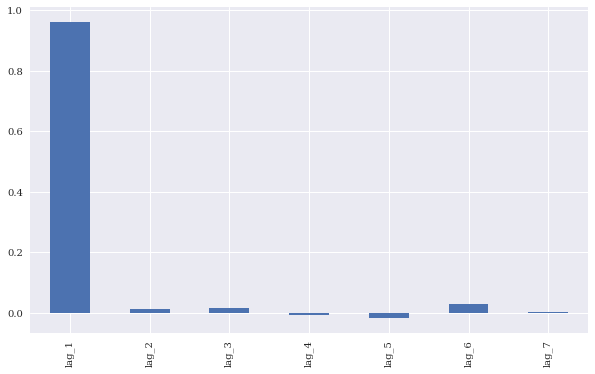

In [16]:
regd.mean().plot(kind='bar',figsize=(10,6))

<AxesSubplot:>

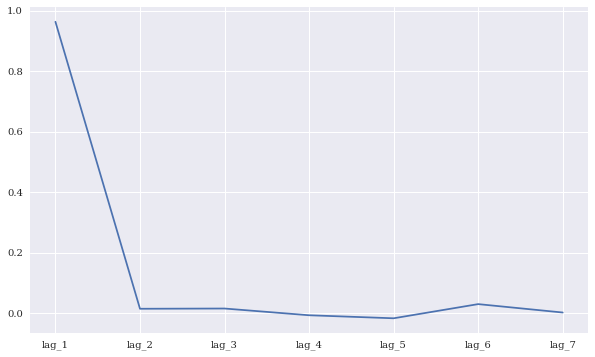

In [17]:
regd.mean().plot(figsize=(10,6))

In [18]:
dfs[sym].corr()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
GLD,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867,0.9841,0.9815
lag_1,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867,0.9842
lag_2,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867
lag_3,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893
lag_4,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920
lag_5,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946
lag_6,0.9841,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972
lag_7,0.9815,0.9842,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000


In [19]:
#都是高度相关的 所以取最后一期数据和取前7天的数据是一样的

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(data[sym].dropna())

(-1.948896957700993,
 0.3094193074034729,
 0,
 2515,
 {'1%': -3.4329527780962255,
  '5%': -2.8626898965523724,
  '10%': -2.567382133955709},
 8446.683102944744)

In [22]:
#股价有点不行 所以用每天的收益率 再来观察 

In [23]:
# market prediction based on returns data

In [24]:
rets=np.log(data/data.shift(1))
rets.dropna(inplace=True)

In [25]:
dfs={}
for sym in data:
    df,cols=add_lags(rets,sym,lags)
    mu,std=df[cols].mean(),df[cols].std()
    df[cols]=(df[cols]-mu)/std  #标准化
    dfs[sym]=df

In [26]:
dfs[sym].head()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-14,0.0044,0.9570,-2.1692,1.3386,0.4959,-0.6434,1.6613,-0.1028
2010-01-15,-0.0105,0.4379,0.9571,-2.1689,1.3388,0.4966,-0.6436,1.6614
2010-01-19,0.0059,-1.0842,0.4385,0.9562,-2.1690,1.3395,0.4958,-0.6435
2010-01-20,-0.0234,0.5967,-1.0823,0.4378,0.9564,-2.1686,1.3383,0.4958
2010-01-21,-0.0145,-2.4045,0.5971,-1.0825,0.4379,0.9571,-2.1680,1.3384


In [27]:
dfs[sym].mean()

GLD      9.8789e-05
lag_1   -2.1691e-18
lag_2    1.0696e-17
lag_3    2.6870e-17
lag_4    8.1894e-18
lag_5    1.4520e-17
lag_6    1.6855e-17
lag_7   -2.0717e-17
dtype: float64

In [28]:
len(dfs[sym])

2508

In [29]:
adfuller(dfs[sym]['lag_1'])

(-51.56825150582551,
 0.0,
 0,
 2507,
 {'1%': -3.4329610922579095,
  '5%': -2.8626935681060375,
  '10%': -2.567384088736619},
 7017.165474260226)

In [31]:
dfs[sym].corr()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
GLD,1.0000,-0.0297,0.0003,1.2635e-02,-0.0026,-5.9392e-03,0.0099,-0.0013
lag_1,-0.0297,1.0000,-0.0305,8.1418e-04,0.0128,-2.8765e-03,-0.0053,0.0098
lag_2,0.0003,-0.0305,1.0000,-3.1617e-02,0.0003,1.3234e-02,-0.0043,-0.0052
lag_3,0.0126,0.0008,-0.0316,1.0000e+00,-0.0313,-6.8542e-06,0.0141,-0.0044
lag_4,-0.0026,0.0128,0.0003,-3.1329e-02,1.0000,-3.1761e-02,0.0002,0.0141
lag_5,-0.0059,-0.0029,0.0132,-6.8542e-06,-0.0318,1.0000e+00,-0.0323,0.0002
lag_6,0.0099,-0.0053,-0.0043,1.4115e-02,0.0002,-3.2289e-02,1.0000,-0.0324
lag_7,-0.0013,0.0098,-0.0052,-4.3869e-03,0.0141,2.1707e-04,-0.0324,1.0000


In [32]:
#结论：用收益率来观察，相关性系数都比较低了，可以进行下面的实验

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
%%time
acc_=[]
for sym in data:
    df=dfs[sym]
    reg=np.linalg.lstsq(df[cols],df[sym],rcond=-1)[0]
    pred=np.dot(df[cols],reg)
    acc=accuracy_score(np.sign(df[sym]),np.sign(pred))
    acc_.append(acc)
    print(f'OLS|{sym:10s}|acc={acc:.4f}')

OLS|AAPL.O    |acc=0.5056
OLS|MSFT.O    |acc=0.5088
OLS|INTC.O    |acc=0.5040
OLS|AMZN.O    |acc=0.5048
OLS|GS.N      |acc=0.5080
OLS|SPY       |acc=0.5080
OLS|.SPX      |acc=0.5167
OLS|.VIX      |acc=0.5291
OLS|EUR=      |acc=0.4984
OLS|XAU=      |acc=0.5207
OLS|GDX       |acc=0.5307
OLS|GLD       |acc=0.5072
Wall time: 37.4 ms


In [35]:
np.array(acc_).mean()

0.5118288144603934

In [36]:
from sklearn.neural_network import MLPRegressor

In [37]:
%%time
acc_=[]
for sym in data.columns:
    df=dfs[sym]
    model=MLPRegressor(hidden_layer_sizes=[512],random_state=100,max_iter=1000,early_stopping=True,validation_fraction=0.15,shuffle=False)
    model.fit(df[cols],df[sym])
    pred=model.predict(df[cols])
    acc=accuracy_score(np.sign(df[sym]),np.sign(pred))
    acc_.append(acc)
    print(f'MLP|{sym:10s}|acc={acc:.4f}')

OLS|AAPL.O    |acc=0.6005
OLS|MSFT.O    |acc=0.5853
OLS|INTC.O    |acc=0.5766
OLS|AMZN.O    |acc=0.5510
OLS|GS.N      |acc=0.6527
OLS|SPY       |acc=0.5419
OLS|.SPX      |acc=0.5399
OLS|.VIX      |acc=0.6579
OLS|EUR=      |acc=0.5642
OLS|XAU=      |acc=0.5522
OLS|GDX       |acc=0.6029
OLS|GLD       |acc=0.5259
Wall time: 10.8 s


In [38]:
np.array(acc_).mean()

0.5792464114832536

In [39]:
#利用决策树来预测明天的收益率

In [40]:
%%time
acc_=[]
from sklearn.tree import DecisionTreeRegressor
for sym in data.columns:
    df=dfs[sym]
    model=DecisionTreeRegressor()
    model.fit(df[cols],df[sym])
    pred=model.predict(df[cols])
    acc=accuracy_score(np.sign(df[sym]),np.sign(pred))
    acc_.append(acc)
    print(f'DTR|{sym:10s}|acc={acc:.4f}')

DTR|AAPL.O    |acc=1.0000
DTR|MSFT.O    |acc=1.0000
DTR|INTC.O    |acc=1.0000
DTR|AMZN.O    |acc=1.0000
DTR|GS.N      |acc=1.0000
DTR|SPY       |acc=1.0000
DTR|.SPX      |acc=1.0000
DTR|.VIX      |acc=1.0000
DTR|EUR=      |acc=1.0000
DTR|XAU=      |acc=1.0000
DTR|GDX       |acc=1.0000
DTR|GLD       |acc=1.0000
Wall time: 497 ms


In [41]:
#只用keras里面的DNN

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [43]:
np.random.seed(100)
tf.random.set_seed(100)

In [44]:
def create_model(problem='regression'):
    model=Sequential()
    model.add(Dense(512,input_dim=len(cols),activation='relu'))
    if problem=='regression':
        model.add(Dense(1,activation='linear'))
        model.compile(loss='mse',optimizer='adam')
    else:
        model.add(Dense(1,activation='sigmoid'))
        model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

In [45]:
%%time
acc_=[]
for sym in data.columns[:]:
    df=dfs[sym]
    model=create_model()
    model.fit(df[cols],df[sym],epochs=25,verbose=False)
    pred=model.predict(df[cols])
    acc=accuracy_score(np.sign(df[sym]),np.sign(pred))
    acc_.append(acc)
    print(f'DNN  | {sym:10s}|acc={acc:.4f}')

DNN  | AAPL.O    |acc=0.6085
DNN  | MSFT.O    |acc=0.6152
DNN  | INTC.O    |acc=0.6236
DNN  | AMZN.O    |acc=0.6276
DNN  | GS.N      |acc=0.6136
DNN  | SPY       |acc=0.5594
DNN  | .SPX      |acc=0.5478
DNN  | .VIX      |acc=0.6148
DNN  | EUR=      |acc=0.5817
DNN  | XAU=      |acc=0.6021
DNN  | GDX       |acc=0.6120
DNN  | GLD       |acc=0.6001
Wall time: 13.1 s


In [46]:
split=int(len(dfs[sym])*0.8)
split

2006

In [48]:
acc_=[]
for sym in data.columns:
    df=dfs[sym]
    train=df.iloc[:split]
    reg=np.linalg.lstsq(train[cols],train[sym],rcond=-1)[0]
    test=df.iloc[split:]
    pred=np.dot(test[cols],reg)
    acc=accuracy_score(np.sign(test[sym]),np.sign(pred))
    acc_.append(acc)
    print(f'OLS  | {sym:10s}|acc={acc:.4f}')

OLS  | AAPL.O    |acc=0.5219
OLS  | MSFT.O    |acc=0.4960
OLS  | INTC.O    |acc=0.5418
OLS  | AMZN.O    |acc=0.4841
OLS  | GS.N      |acc=0.4980
OLS  | SPY       |acc=0.5020
OLS  | .SPX      |acc=0.5120
OLS  | .VIX      |acc=0.5458
OLS  | EUR=      |acc=0.4482
OLS  | XAU=      |acc=0.5299
OLS  | GDX       |acc=0.5159
OLS  | GLD       |acc=0.5100


In [49]:
np.array(acc_).mean()

0.5087981407702523

In [50]:
%%time
acc_=[]
for sym in data.columns:
    df=dfs[sym]
    train=df.iloc[:split]
    model=MLPRegressor(hidden_layer_sizes=[512],random_state=100,max_iter=1000,early_stopping=True,validation_fraction=0.15,shuffle=False)
    
    model.fit(train[cols],train[sym])
    
    test=df.iloc[split:]
    
    pred=model.predict(test[cols])
    acc=accuracy_score(np.sign(test[sym]),np.sign(pred))
    acc_.append(acc)
    print(f'MLP|{sym:10s}|acc={acc:.4f}')

MLP|AAPL.O    |acc=0.4920
MLP|MSFT.O    |acc=0.5279
MLP|INTC.O    |acc=0.5279
MLP|AMZN.O    |acc=0.4641
MLP|GS.N      |acc=0.5040
MLP|SPY       |acc=0.5259
MLP|.SPX      |acc=0.5478
MLP|.VIX      |acc=0.5279
MLP|EUR=      |acc=0.4980
MLP|XAU=      |acc=0.5239
MLP|GDX       |acc=0.4880
MLP|GLD       |acc=0.5000
Wall time: 10.4 s


In [52]:
np.array(acc_).mean()

0.5106241699867199

# marketing prediction with more features

In [53]:
data=pd.read_csv(url,index_col=0,parse_dates=True).dropna()

In [57]:
def add_lags(data,ric,lags,window=50):
    cols=[]
    df=pd.DataFrame(data[ric])
    df.dropna(inplace=True)
    df['r']=np.log(df/df.shift())
    df['sma']=df[ric].rolling(window).mean()
    df['min']=df[ric].rolling(window).min()
    df['max']=df[ric].rolling(window).max()
    df['mom']=df['r'].rolling(window).mean()
    df['vol']=df['r'].rolling(window).std()
    
    df.dropna(inplace=True)
    df['d']=np.where(df['r']>0,1,0)
    features=[ric,'r','d','sma','min','max','mom','vol']
    for f in features:
        for lag in range(1,lags+1):
            col=f'{f}__lag__{lag}'
            df[col]=df[f].shift(lag)
            cols.append(col)
            
    df.dropna(inplace=True)
    return df, cols

In [58]:
lags=5

In [59]:
dfs={}
for ric in data:
    df,cols=add_lags(data,ric,lags)
    dfs[ric]=df.dropna(),cols

In [60]:
len(cols)

40

In [61]:
dfs[ric]

(               GLD       r       sma     min     max         mom     vol  d  \
 Date                                                                          
 2010-03-24  106.30 -0.0188  108.5191  104.04  112.03 -1.1959e-03  0.0120  0   
 2010-03-25  106.78  0.0045  108.4449  104.04  112.03 -6.8309e-04  0.0117  1   
 2010-03-26  108.59  0.0168  108.3859  104.04  112.03 -5.3608e-04  0.0119  1   
 2010-03-29  108.75  0.0015  108.3203  104.04  111.63 -5.9430e-04  0.0118  1   
 2010-03-30  107.97 -0.0072  108.2625  104.04  111.63 -5.2829e-04  0.0118  0   
 ...            ...     ...       ...     ...     ...         ...     ... ..   
 2019-12-24  141.27  0.0094  139.2466  137.01  142.56  9.6502e-05  0.0056  1   
 2019-12-26  142.38  0.0078  139.3020  137.01  142.56  3.9293e-04  0.0057  1   
 2019-12-27  142.33 -0.0004  139.3404  137.01  142.56  2.7163e-04  0.0056  0   
 2019-12-30  142.63  0.0021  139.3808  137.01  142.63  2.8528e-04  0.0056  1   
 2019-12-31  142.90  0.0019  139.4296  1

In [62]:
from sklearn.neural_network import MLPClassifier

In [67]:
%%time
acc_=[]
for ric in data:
#     df=dfs[sym]
    model=MLPClassifier(hidden_layer_sizes=[512],random_state=100,max_iter=1000,early_stopping=True,validation_fraction=0.15,shuffle=False)
    
    df,cols=dfs[ric]
    df[cols]=(df[cols]-df[cols].mean())/df[cols].std()
    model.fit(df[cols],df['d'])
    pred=model.predict(df[cols])
    acc=accuracy_score(df['d'],pred)
    acc_.append(acc)
    print(f'IN-SAMPLT  |{ric:10s}|acc={acc:.4f}')


IN-SAMPLT  |AAPL.O    |acc=0.5510
IN-SAMPLT  |MSFT.O    |acc=0.5376
IN-SAMPLT  |INTC.O    |acc=0.5607
IN-SAMPLT  |AMZN.O    |acc=0.5559
IN-SAMPLT  |GS.N      |acc=0.5794
IN-SAMPLT  |SPY       |acc=0.5729
IN-SAMPLT  |.SPX      |acc=0.5941
IN-SAMPLT  |.VIX      |acc=0.6940
IN-SAMPLT  |EUR=      |acc=0.5766
IN-SAMPLT  |XAU=      |acc=0.5672
IN-SAMPLT  |GDX       |acc=0.5847
IN-SAMPLT  |GLD       |acc=0.5567
Wall time: 6.37 s


In [68]:
np.array(acc_).mean()

0.5775768657727212

In [69]:
%%time
acc_=[]
for ric in data:

    model=create_model('classification')
    df,cols=dfs[ric]
    df[cols]=(df[cols]-df[cols].mean())/df[cols].std()
    model.fit(df[cols],df['d'],epochs=50,verbose=False)
    pred=np.where(model.predict(df[cols])>0.5,1,0)
    
    acc=accuracy_score(df['d'],pred)
    acc_.append(acc)
    print(f'DNN in sample | {sym:7s}|acc={acc:.4f}')

DNN in sample | GLD    |acc=0.6989
DNN in sample | GLD    |acc=0.6973
DNN in sample | GLD    |acc=0.7066
DNN in sample | GLD    |acc=0.6595
DNN in sample | GLD    |acc=0.6952
DNN in sample | GLD    |acc=0.6822
DNN in sample | GLD    |acc=0.6908
DNN in sample | GLD    |acc=0.7412
DNN in sample | GLD    |acc=0.6749
DNN in sample | GLD    |acc=0.7062
DNN in sample | GLD    |acc=0.6822
DNN in sample | GLD    |acc=0.6952
Wall time: 25.9 s


In [70]:
np.array(acc_).mean()

0.6941961262359473

In [75]:
def train_test_model(model):
    acc_=[]
    for ric in data:
        df,cols=dfs[ric]
        split=int(len(df)*0.85)
        train=df.iloc[:split].copy()
        mu,std=train[cols].mean(),train[cols].std()
        train[cols]=(train[cols]-mu)/std
        model.fit(train[cols],train['d'])
        test=df.iloc[split:].copy()
        test[cols]=(test[cols]-mu)/std
        pred=model.predict(test[cols])
        acc=accuracy_score(test['d'],pred)
        acc_.append(acc)
        print(f'DNN in sample split | {sym:7s}|acc={acc:.4f}')
    print('\n the average accuracy rate is', np.array(acc_).mean())

In [73]:
model_mlp=MLPClassifier(hidden_layer_sizes=[512],random_state=100,max_iter=1000,early_stopping=True,validation_fraction=0.15,shuffle=False)

In [76]:
%time train_test_model(model_mlp)

DNN in sample split | GLD    |acc=0.4432
DNN in sample split | GLD    |acc=0.4595
DNN in sample split | GLD    |acc=0.5000
DNN in sample split | GLD    |acc=0.5270
DNN in sample split | GLD    |acc=0.4838
DNN in sample split | GLD    |acc=0.4811
DNN in sample split | GLD    |acc=0.5027
DNN in sample split | GLD    |acc=0.5676
DNN in sample split | GLD    |acc=0.4649
DNN in sample split | GLD    |acc=0.5514
DNN in sample split | GLD    |acc=0.5162
DNN in sample split | GLD    |acc=0.4946

 the average accuracy rate is 0.4993243243243242
Wall time: 4.34 s


In [77]:
from sklearn.ensemble import BaggingClassifier

In [78]:
base_estimator=MLPClassifier(hidden_layer_sizes=[512],random_state=100,max_iter=1000,early_stopping=True,validation_fraction=0.15,shuffle=False)

In [79]:
model_bag=BaggingClassifier(base_estimator=base_estimator,n_estimators=35,max_samples=0.25,max_features=0.5,bootstrap=False,bootstrap_features=True
                           ,n_jobs=-1,random_state=100)

In [80]:
%time train_test_model(model_bag)

DNN in sample split | GLD    |acc=0.5432
DNN in sample split | GLD    |acc=0.5703
DNN in sample split | GLD    |acc=0.5027
DNN in sample split | GLD    |acc=0.5270
DNN in sample split | GLD    |acc=0.4838
DNN in sample split | GLD    |acc=0.5541
DNN in sample split | GLD    |acc=0.5514
DNN in sample split | GLD    |acc=0.5405
DNN in sample split | GLD    |acc=0.4757
DNN in sample split | GLD    |acc=0.5189
DNN in sample split | GLD    |acc=0.5324
DNN in sample split | GLD    |acc=0.5351

 the average accuracy rate is 0.527927927927928
Wall time: 20.3 s
